In [1]:
import numpy as np
import asterion as ast
from asterion import GlitchModel, Inference

/Users/alyttle/.pyenv/versions/asterion/lib/python3.9/site-packages/jax/_src/lib/__init__.py:32: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [2]:
# Di Mauro (2015)
nu_max = (220.0, 3.0)  # in microhertz
delta_nu = (16.97, 0.05)   # in microhertz
teff = (4750, 250)    # in Kelvin

nu = [159.842,  176.277,  192.907, 209.929, 226.831,  243.879,  261.215]
nu_err = [0.014, 0.018, 0.016, 0.014, 0.014, 0.013, 0.034]

In [3]:
n = np.floor(np.divide(nu, delta_nu[0]) - 1.2)
print(n)

[ 8.  9. 10. 11. 12. 13. 14.]


In [4]:
model = GlitchModel(n, nu_max, delta_nu, teff=teff)

INFO[2022-03-04 11:53:33,942]: Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
INFO[2022-03-04 11:53:33,947]: Unable to initialize backend 'gpu': NOT_FOUND: Could not find registered platform with name: "cuda". Available platform names are: Interpreter Host
INFO[2022-03-04 11:53:33,952]: Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.


In [5]:
infer = Inference(model, nu=nu, nu_err=nu_err, seed=10)
infer.prior_predictive()  # <-- check prior is sensible
prior_data = infer.get_data()

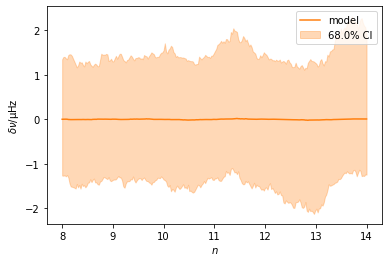

In [6]:
ast.plot_glitch(prior_data, group='prior');

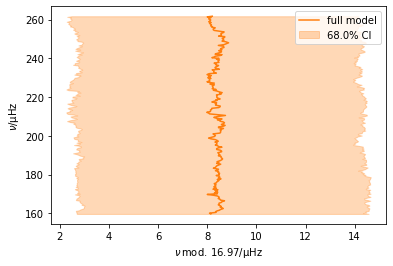

In [7]:
ast.plot_echelle(prior_data, group='prior');

In [14]:
infer.sample()
infer.posterior_predictive()

Running nested sampling using the 'multi_ellipsoid' sampler with 100 live points and 100000 maximum samples...
Completed in 12.1 seconds.


In [15]:
data = infer.get_data()

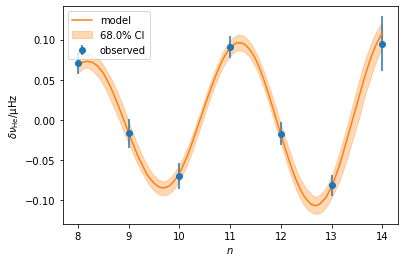

In [16]:
ast.plot_glitch(data, kind='He');

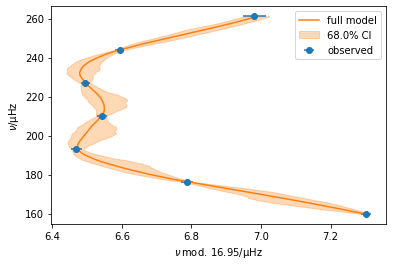

In [17]:
ast.plot_echelle(data);

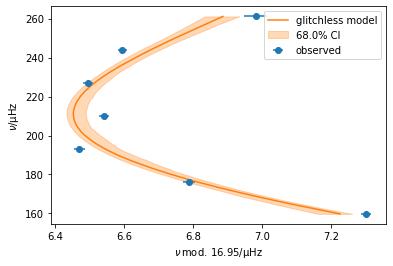

In [18]:
ast.plot_echelle(data, kind='glitchless');

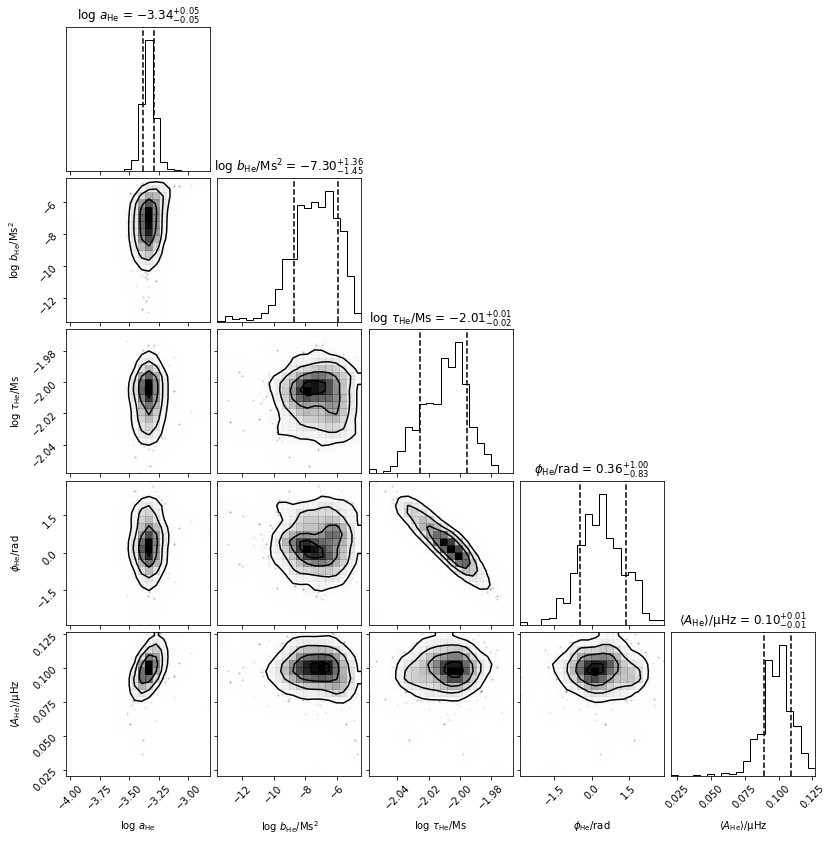

In [19]:
ast.plot_corner(data, var_names=['log_a_he', 'log_b_he', 'log_tau_he', 'phi_he', 'he_amplitude']);

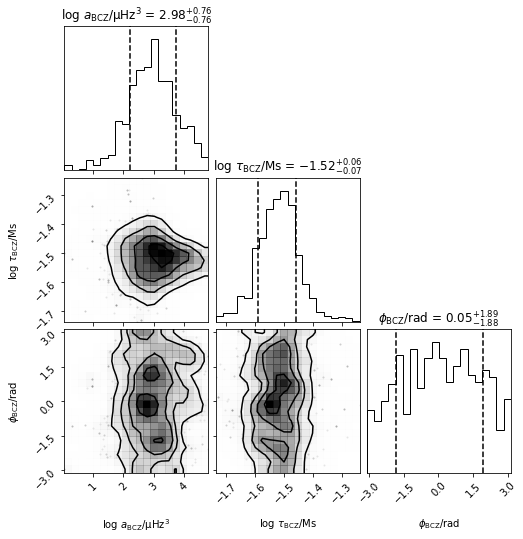

In [20]:
ast.plot_corner(data, var_names=['log_a_cz', 'log_tau_cz', 'phi_cz']);